In [1]:
%pylab inline
import matplotlib.pyplot as plt
from numpy.random import normal
from scipy.integrate import quad
import random as rd
from scipy.stats import norm
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


Para la integración usando el metodo de 'importance sampling' usaremos una distribución gaussiana, verificaremos primero que la función 'normal' de numpy.random en realidad si da números aleatorios con distribución gaussiano, esto es:

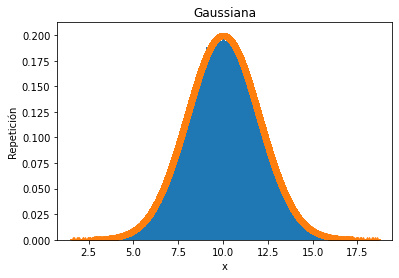

In [12]:
#
n =100000 #Cantidad de números aleatorios a generar
plt.title("Gaussiana")
plt.xlabel("x")
plt.ylabel("Probabilidad")
def Gaussiana(x,mu,sigma,a): 
    
    return norm.pdf(x,mu,sigma)*a

mu, sigma = 10, 2 #Media y desviación estandar arbitrarias
x = normal(mu,sigma,size=n)
plt.hist(x, bins=100,density=True)
plt.plot(x,Gaussiana(x,mu,sigma,1),'*')
plt.show()


# 1)

Calcularemos la primera integral dada de la siguiente manera: ya que debemos encontrar una distribución que sea lo más cercana a $f(x)=x^2-4$ en el intervalo [0,10], usaremos 'from scipy.optimize import curve_fit', este modulo permite encontrar los parametros asociados a la distribución que más se acercan a $f(x)$. Por otro lado ya que en el intervalo [0,10] f(x) no esta normalizada, multiplicamos y dividimos el integrando por una constante, esto es:

$$\int_{0}^{10}{dx(x^2-4)}=A \int_{0}^{10}{dx(x^2-4)}\frac{N(x,\mu,\sigma^2)}{AN(x,\mu,\sigma^2)} \hspace{0.2cm} (1)$$

Siendo $N(x,\mu,\sigma^2)$ una distribución normal. Como se dijo, se ajustara $AN(x,\mu,\sigma^2)$ y el resultado es multiplicado por apartir de la tecnica 'importance sampling' es multiplicado por A de acuerdo a (1).

mej_val: [ 11.73225712   3.66785928 948.50270637]


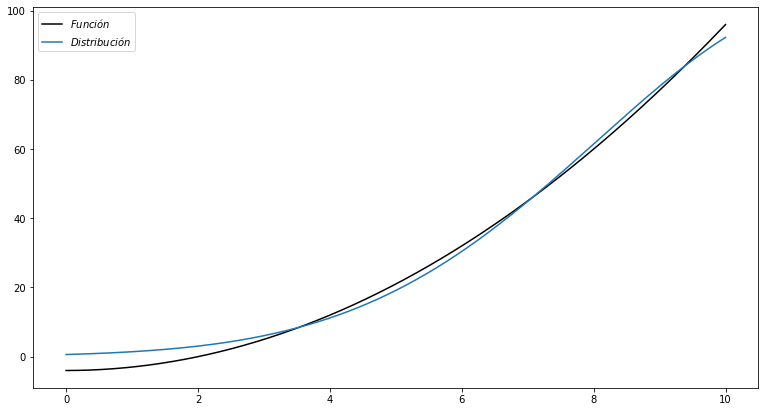

In [45]:
y=lambda x: x**2-4  #Función a integrar

I = quad(y, 0, 10) #Metodo de cuadratura para el calculo de la integral.

sigma,mu =3, 10


def Gaussiana(x,mu,sigma,a):  #Función ajustar
    
    return norm.pdf(x,mu,sigma)*a

x=np.linspace(0,10,1000) #Intervalo de integración.



val_ini = [mu,sigma,.0] #Valores iniciales para realizar el ajuste
a, cov = curve_fit(Gaussiana,x,y(x),val_ini) 
print('mej_val: {}'.format(a)) #Valores del ajuste.


plt.figure(figsize=(13,7))

plt.plot(x,y(x),'k',label='$Función$') #Función

plt.plot(x,Gaussiana(x,a[0],a[1],a[2]),label='$Distribución$') #Distribución


plt.legend()





In [82]:
n =1050000 #Cantidad de números aleatorios a generar

#Rango de valores para mu y sigma


mu=a[0]
sigma=a[1]


x = normal(mu,sigma,size=n) #Números aleatorios con distribución gaussiana de parametros mu y sigma

s=[] #Lista vacia
    
for j in range(len(x)): # Se eligen solo números aleatorios en el intevalo de integración y se guardan en s
    if x[j]>=0 and x[j]<=10 :
        s.append(x[j]) #Números aleatorios en el intevalo de integración
    
s=np.array(s)
    
k=(1/len(x))*sum(y(s)/Gaussiana(s,mu,sigma,a[2]))*a[2]  #Valor esperado de la integral con el metodo importance sampling
    
    
  

In [85]:
print('El valor de la integral, usando el metodo de importance sampling, es:',k) #Se multiplica el resultado final por A como se dijo.
print('Error porcentual:',round(abs(I[0]-k)/I[0]*100,2),'%')

El valor de la integral, usando el metodo de importance sampling, es: 293.4073852804081
Error porcentual: 0.03 %


# 2)

Para el calculo de esta integral implementaremos un método distinto al anterior, en lugar de utilizar el modulo ya mencionado, construiremos un programa que nos permita en principio elegir la tolerancia de error asociado al cálculo de la integral. Para ello partimos con dos valores de $\mu$ y $\sigma$ asociados a la distribución normal, luego buscamos dentro de un intervalo estos dos ultimos parametros que cumplan la condición de tolerancia en el cálculo de la integral usando el método 'importance sampling', esto es:

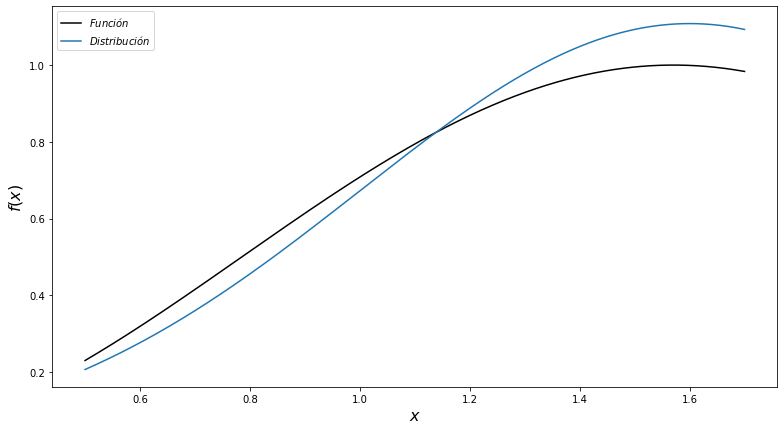

In [91]:
#Comparación de función con distribución para elegir los parametros de inicio mu y sigma

sigma,mu =0.6, 1.6 #Parametros arbitrarios para la distribución

f=lambda x: np.sin(x)*np.sin(x) # Función a integrar

p=lambda x: 1/((2*pi)**0.5*sigma**2)*exp(-(x-mu)**2/(2*sigma**2)) #Distribución

x=linspace(0.5,1.7,1000) #Intervalo de integración



plt.figure(figsize=(13,7))

plt.plot(x,f(x),'k',label='$Función$')
plt.xlabel('$x$',fontsize=16)
plt.ylabel('$f(x)$',fontsize=16)
plt.plot(x,p(x),label='$Distribución$')

plt.legend()

Vemos que la función a integrar y la distibución son bastante similares, sin embargo, se han elegido  e $\sigma$ y $\mu$ de forma arbitraria. A continuación se implementara un codigo que permita elegir $\sigma$ y $\mu$ de tal forma que se minimice el error en el calculo de la integral por el metodo 'Importance sampling'

In [92]:
I = quad(f, 0.5, 1.7) #Método de cuadratura para la integración en el intervalo [0.5,1.7]

tol=0.001 #Se define una tolerancia que permita elegir mu y sigma de acuerdo al valor real I[0] de la integral
f=lambda x: np.sin(x)*np.sin(x) #Función a integrar
n =100000 #Cantidad de números aleatorios a generar

#Rango de valores para mu y sigma

mu=np.linspace(1.5,1.6,100) #Intervalo de la media

sigma=np.linspace(0.5,0.6,100) #Intervalo de la desviación estanda

for i in range(len(mu)):
    
    
    s=[]
    
    
    
    x = normal(mu[i],sigma[i],size=n) #Números aleatorios con distribución gaussiana de parametros mu[i] y sigma[i]
    
    
    
    p=lambda x: 1/((2*pi)**0.5*sigma[i]**2)*exp(-(x-mu[i])**2/(2*sigma[i]**2)) #Distribución gaussiana
    
    for j in range(len(x)): # Se eligen solo números aleatorios en el intevalo de integración y se guardan en s
        if x[j]>=0.5 and x[j]<=1.7 :
            s.append(x[j])
            
    s=np.array(s)
       
    k=(1/len(s))*sum(f(s)/p(s)) #Valor esperado de la integral con el metodo importance sampling
    
   
    if abs(I[0]-k)<tol:
        
        break









In [93]:
print('El valor de la integral, usando el metodo de importance sampling, es:',k)
print('Error porcentual:',abs(k-I[0])/I[0]*100,'%')

El valor de la integral, usando el metodo de importance sampling, es: 0.874252931409306
Error porcentual: 1.0328746237689399e-05 %


Text(0.5, 1.0, 'Aproximación entre graficos de acuerdo al mu y sigma elegido')

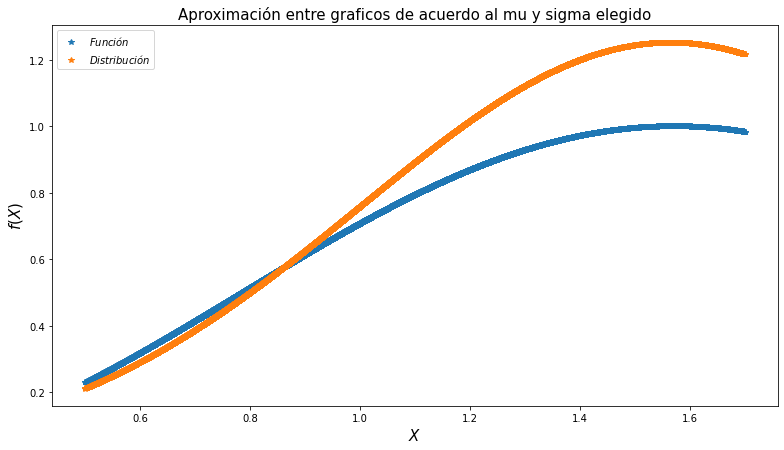

In [100]:
plt.figure(figsize=(13,7))
plt.plot(s,f(s),'*',label='$Función$')
plt.plot(s,p(s),'*',label='$Distribución$')
plt.xlabel('$X$',fontsize=15)
plt.ylabel('$f(X)$',fontsize=15)
plt.legend()
plt.title('Aproximación entre graficos de acuerdo al mu y sigma elegido',fontsize=15)



In [250]:
35*5

175